In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new=pd.read_csv('/content/Advertising.csv')

In [3]:
new.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=new.drop(['Unnamed: 0'],axis=1)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.shape

(200, 4)

In [9]:
data.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

<Axes: xlabel='TV', ylabel='Radio'>

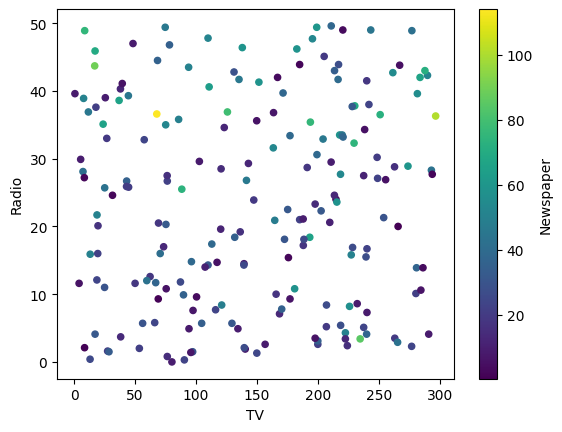

In [10]:
data.plot.scatter(x='TV',y='Radio',c='Newspaper')

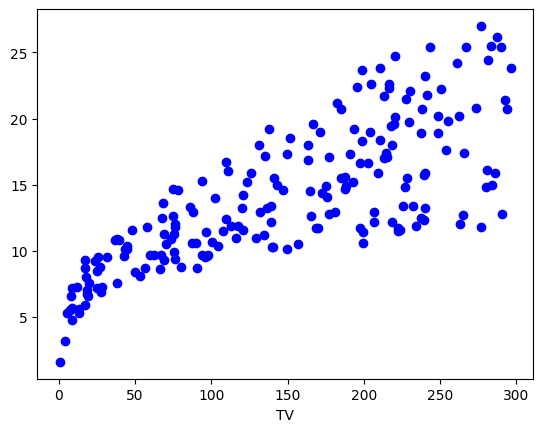

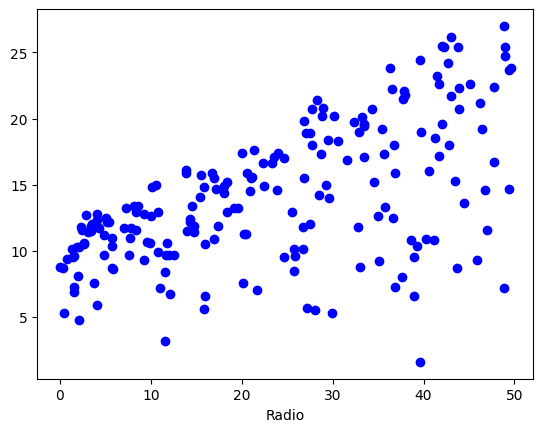

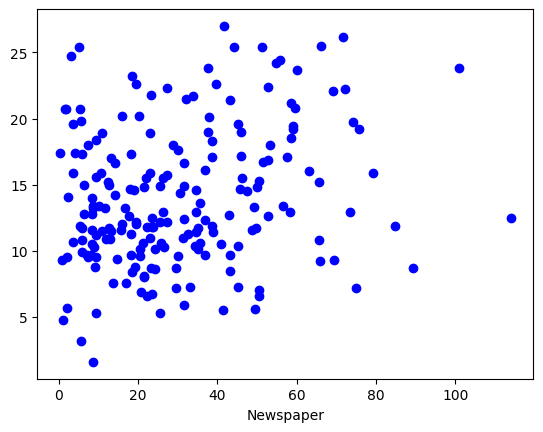

In [18]:
plt.scatter(data['TV'],data['Sales'],color='b',marker='o',alpha=1)
plt.xlabel('TV')
plt.show()

plt.scatter(data['Radio'],data['Sales'],color='b',marker='o',alpha=1)
plt.xlabel('Radio')
plt.show()

plt.scatter(data['Newspaper'],data['Sales'],color='b',marker='o',alpha=1)
plt.xlabel('Newspaper')
plt.show()

In [21]:
#SIMPLE LINEAR REGRESSION   since it is simple linear i took only one feature for prediction
feature_cols=['TV']
x=data[feature_cols]
y=data.Sales

In [22]:
#Train Test split in 80-20 ratio

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [24]:
#FITING THE MODEL TO OUR TRAINING DATA   when fit is there in backgrounf gradient desccent is happening y=mx+c
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
#checking the intercept and co-efficient
print(model.intercept_)
print(model.coef_)

6.799773449796853
[0.0492751]


In [26]:
#prediction for train and test dataset
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [27]:
pred_train

array([ 7.4452772 , 11.2542421 ,  7.72121774, 16.85682048,  7.15948165,
       14.05799504, 10.65308593, 18.03449526, 16.90116806, 18.10840791,
       21.07476866, 12.86553773,  7.75571031, 15.79740592, 19.88723886,
       14.95972929, 17.56638185,  8.03165084, 18.23652315,  8.91860256,
       13.65886677, 13.66379428,  7.06585897, 21.26694154, 20.66578537,
        7.22846678, 10.75163612, 13.59480914, 17.99507519,  8.35193896,
       19.74434108, 17.32000637, 20.97129096,  7.37629207,  7.68179766,
       17.1278335 ,  7.97252073, 10.56439076, 19.16289495, 13.76234447,
       16.05363642, 13.4174188 , 18.61594139, 17.83739488, 10.52004317,
       11.60409528, 10.51018815,  7.21368425, 16.21624423, 15.4278427 ,
       13.46176638, 19.95129648, 11.02264915, 13.6736493 , 15.24059734,
       16.05856393,  8.6820821 , 15.52146538,  8.67222709, 15.09769956,
        7.63252257, 18.49768116,  8.20904119, 16.53653235,  7.6473051 ,
       16.610445  , 16.31972193, 20.6312928 ,  9.63309145, 15.45

In [56]:
#assessing model performance thru various metrices

from sklearn.metrics import r2_score,mean_squared_error
print('RMSE for train data is:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('R2 Score for train data is:',r2_score(y_train,pred_train))
print('RMSE for test data is:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score for test data is:',r2_score(y_test,pred_test))

RMSE for train data is: 1.7369025901470923
R2 Score for train data is: 0.8959372632325174
RMSE for test data is: 1.4113417558581582
R2 Score for test data is: 0.8927605914615384


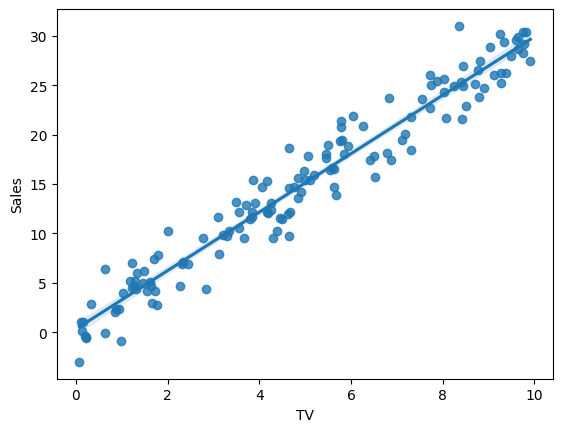

In [59]:


# Plotting using seaborn regplot
sns.regplot(x=np.reshape(x_train, newshape=(140,)), y=np.reshape(y_train, newshape=(140,)))
plt.xlabel('TV')  # Corrected xlabel method
plt.ylabel('Sales')  # Corrected ylabel method
plt.show()

In [41]:
#MULTIPLE LINEAR REGRESSION   since it is simple linear i took only one feature for prediction
feature_cols=['TV','Newspaper','Radio']
x=data[feature_cols]
y=data.Sales

In [44]:
#Train Test split in 80-20 ratio

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
#Standardisation #fit vs transform vs fittransform
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [46]:
#Training the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [47]:
#checking the intercept and co-efficient
print(model.intercept_)
print(model.coef_)

13.811250000000001
[4.09287129 0.05435329 2.7126018 ]


In [48]:
#prediction for train and test dataset
pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

In [53]:
#assessing model performance thru various metrices

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('RMSE for train data is:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('R2 Score for train data is:',r2_score(y_train,pred_train))
print('RMSE for test data is:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score for test data is:',r2_score(y_test,pred_test))

RMSE for train data is: 1.7369025901470923
R2 Score for train data is: 0.8959372632325174
RMSE for test data is: 1.4113417558581582
R2 Score for test data is: 0.8927605914615384


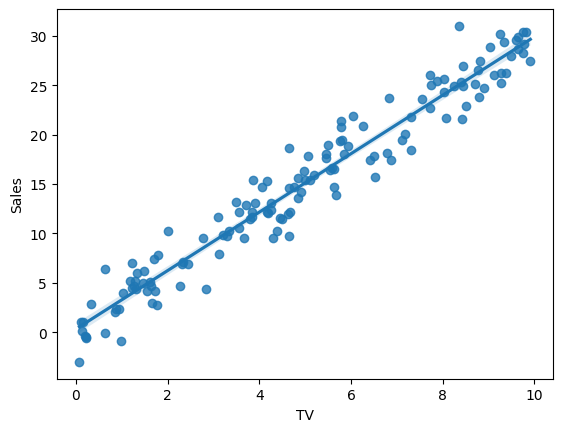

In [60]:
sns.regplot(x=np.reshape(x_train, newshape=(140,)), y=np.reshape(y_train, newshape=(140,)))
plt.xlabel('TV')  # Corrected xlabel method
plt.ylabel('Sales')  # Corrected ylabel method
plt.show()


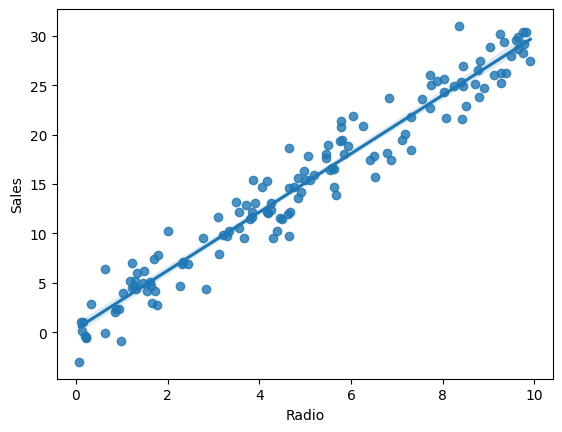

In [61]:
sns.regplot(x=np.reshape(x_train, newshape=(140,)), y=np.reshape(y_train, newshape=(140,)))
plt.xlabel('Radio')  # Corrected xlabel method
plt.ylabel('Sales')  # Corrected ylabel method
plt.show()

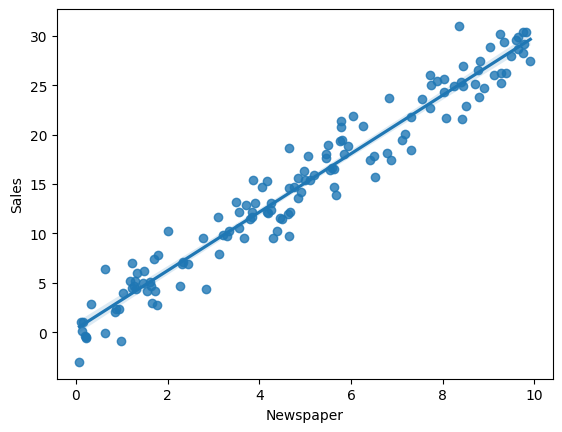

In [62]:
sns.regplot(x=np.reshape(x_train, newshape=(140,)), y=np.reshape(y_train, newshape=(140,)))
plt.xlabel('Newspaper')  # Corrected xlabel method
plt.ylabel('Sales')  # Corrected ylabel method
plt.show()